In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class network2():
    def forward(w,wo,x,dt,tau):
        #w = torch.cat((torch.exp(e_log),-torch.exp(i_log)),axis = 1)
        u = torch.rand(4,1)
        for i in range(1000):
            u = u + 1/tau*(-u+torch.matmul(w,h(u)) + x)*dt #+ (2/tau)**0.5*dt**0.5*c@torch.randn(20,1)
        o = wo@u
        return o
    def loss1(o,x):
        return (o-x)**2
                           

In [3]:
'''mode1 = torch.randn(100000)*0.1  + 1
mode2 = torch.randn(100000)*0.1  - 1
samples = torch.cat((mode1,mode2))
high,bin_edges = torch.histogram(samples,bins = 20, density = True)
target = high*(bin_edges[1]-bin_edges[0]) + 10**-12
plt.plot(target.numpy())
torch.sum(target)'''

'mode1 = torch.randn(100000)*0.1  + 1\nmode2 = torch.randn(100000)*0.1  - 1\nsamples = torch.cat((mode1,mode2))\nhigh,bin_edges = torch.histogram(samples,bins = 20, density = True)\ntarget = high*(bin_edges[1]-bin_edges[0]) + 10**-12\nplt.plot(target.numpy())\ntorch.sum(target)'

In [4]:
#print(torch.mean(samples**2))

In [12]:
h = torch.nn.ReLU()
dt = 0.001
tau = 0.02

In [13]:
max_eig = True
while max_eig:
    w = torch.randn((4,4))
    eig = torch.linalg.eig(w)[1]
    if np.max(np.real(eig.numpy()))<1:
        max_eig = False

In [14]:
w = torch.autograd.Variable(w,requires_grad = True)
wo = torch.autograd.Variable(torch.randn(1,4),requires_grad = True)
#c = torch.autograd.Variable(torch.eye(20)*0.1,requires_grad = True)

In [21]:
optimizer = torch.optim.Adam([w,wo], 0.05)

In [22]:
#loss_list = []
import sys
for m in range(30):
    optimizer.zero_grad()
    L = 0
    for i in range(50):
        x = torch.randn(1)
        o = network2.forward(w,wo,x,dt,tau)
        L = L + network2.loss1(o,x)
    
    L1 = L.detach().numpy()

    print(L1)
    loss_list.append(L1.reshape(-1))

    if np.isnan(L1) == True:
        print('error')
        sys.exit(0)
    
    L.backward()
    optimizer.step()

[[0.5831298]]
[[0.01610375]]
[[0.21881625]]
[[0.78604126]]
[[0.20639575]]
[[0.10101675]]
[[0.1389045]]
[[0.26197413]]
[[0.21985438]]
[[0.27672255]]
[[0.18208352]]
[[0.09109598]]
[[0.02118762]]
[[0.06524371]]
[[0.17425266]]
[[0.11792387]]
[[0.08508603]]
[[0.03412559]]
[[0.01055504]]
[[0.00441838]]
[[0.04371046]]
[[0.03847158]]
[[0.03083749]]
[[0.02387559]]
[[0.00651721]]
[[0.00126927]]
[[0.00178441]]
[[0.01102397]]
[[0.0173224]]
[[0.01666412]]


[0.01666412]


Text(0, 0.5, 'loss')

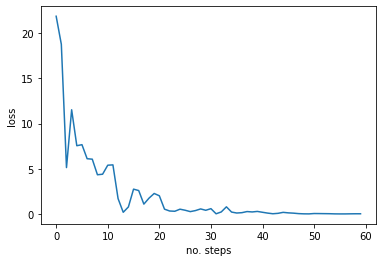

In [24]:
plt.plot(np.array(loss_list).reshape(-1))
print(loss_list[-1])
plt.xlabel('no. steps')
plt.ylabel('loss')

In [26]:
(loss_list[-1]/50)**0.5

array([0.01825603], dtype=float32)